In [1]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
df = pd.read_csv(
    "https://media.githubusercontent.com/media/mayurasandakalum/datasets/main/mall-customer-segmentation-k-means/Mall_Customers.csv"
)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# change the "Genre" column to "Gender"
df.rename(columns={"Genre": "Gender"}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(["CustomerID"], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

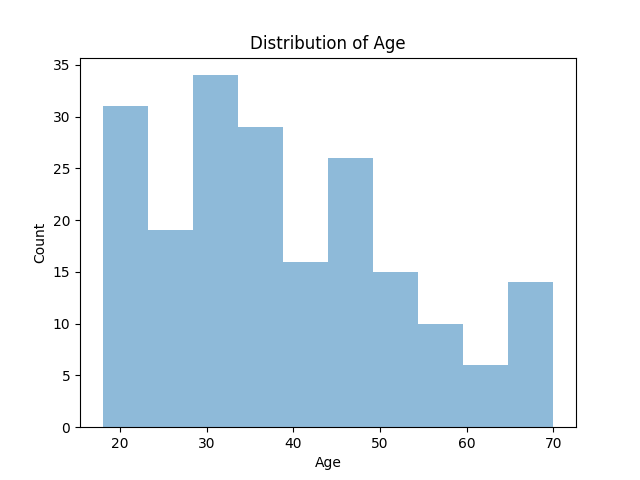

In [11]:
plt.hist(df["Age"], bins=10, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

C:\Users\Makara\AppData\Local\Temp\ipykernel_13864\2869189067.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\Makara\AppData\Local\Temp\ipykernel_13864\2869189067.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
C:\Users\Makara\AppData\Local\Temp\i

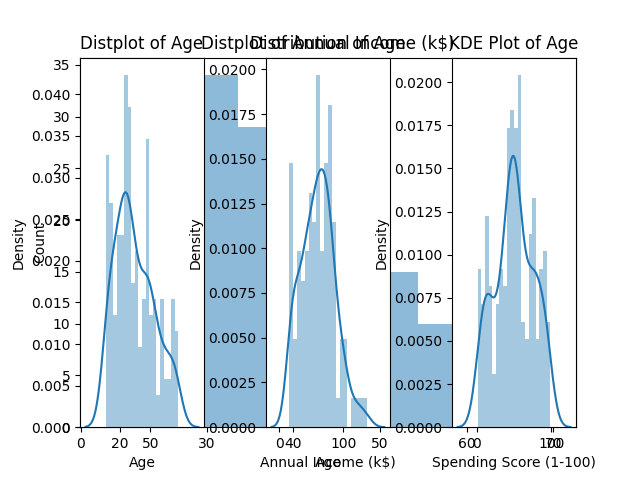

In [12]:
plt.figure(1, figsize=(15, 6))
n = 0

for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Distplot of {}".format(x))

# Single KDE plot example
# plt.figure(2)
# sns.kdeplot(df['Age'], shade=True, linewidth=3)
plt.title("KDE Plot of Age")
plt.show()

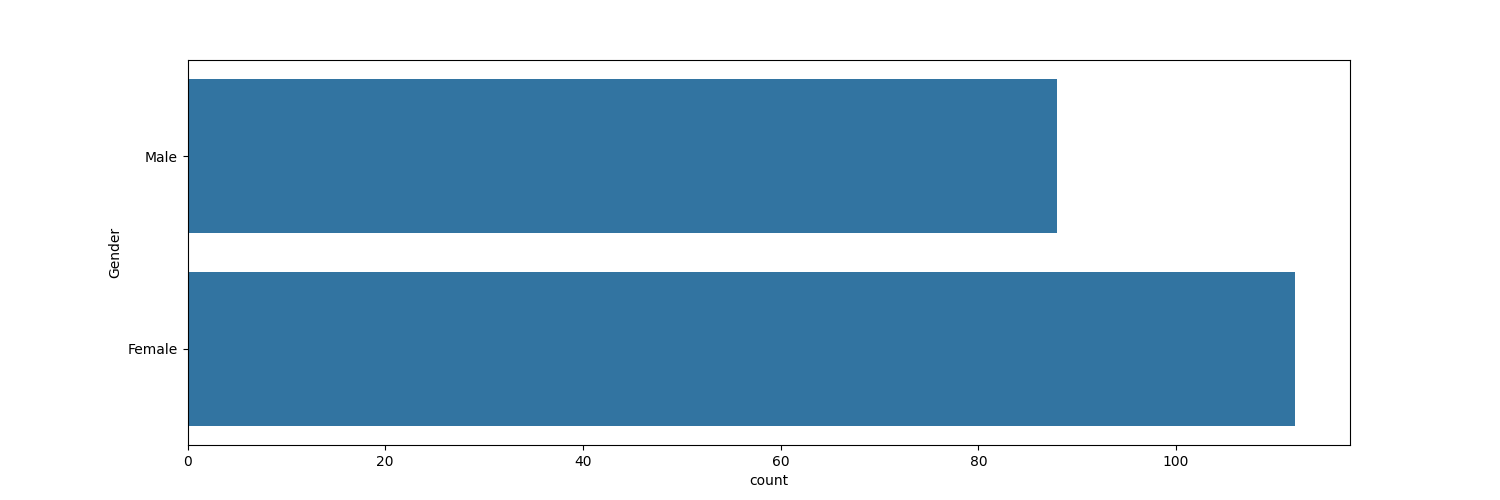

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(y="Gender", data=df)
plt.show()

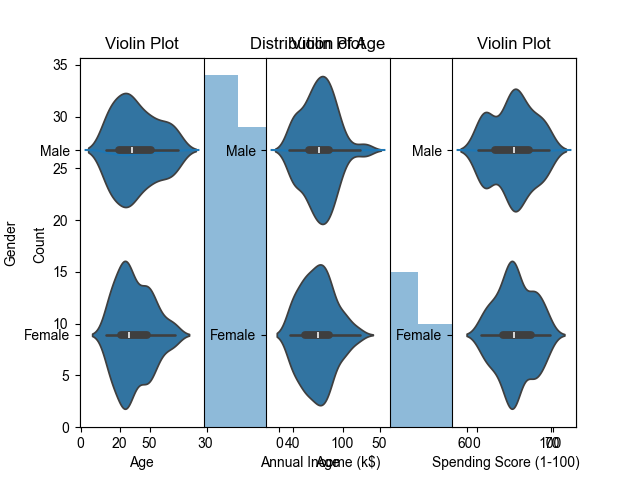

In [14]:
plt.figure(1, figsize=(15, 6))
n = 0

for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y="Gender", data=df)
    plt.ylabel("Gender" if n == 1 else "")
    plt.title("Violin Plot")

plt.show()

C:\Users\Makara\AppData\Local\Temp\ipykernel_13864\3151046912.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="muted")


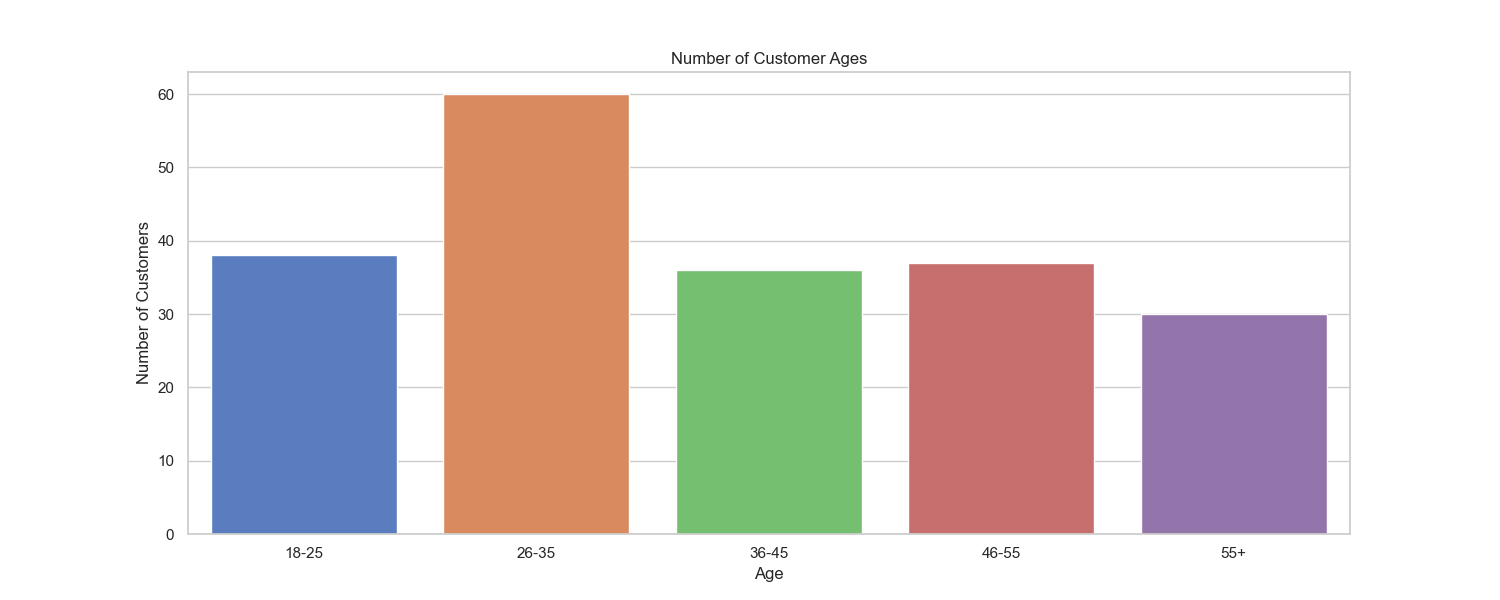

In [15]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55_above = df.Age[(df.Age >= 55)]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [
    len(age_18_25.values),
    len(age_26_35.values),
    len(age_36_45.values),
    len(age_46_55.values),
    len(age_55_above.values),
]

plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="muted")
plt.title("Number of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

relationship between anual income and the Spending Score


In [16]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

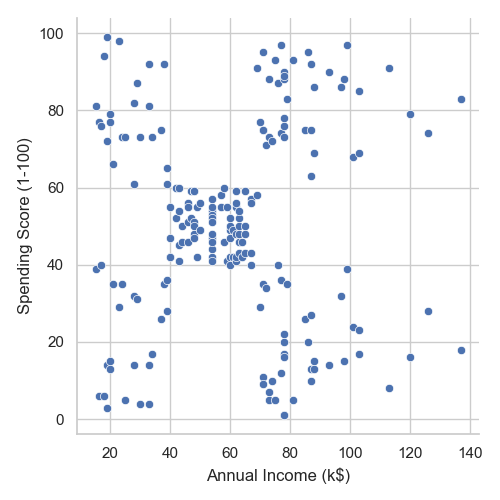

In [17]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

divide Spending Score different categories


C:\Users\Makara\AppData\Local\Temp\ipykernel_13864\1918176239.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="rocket")


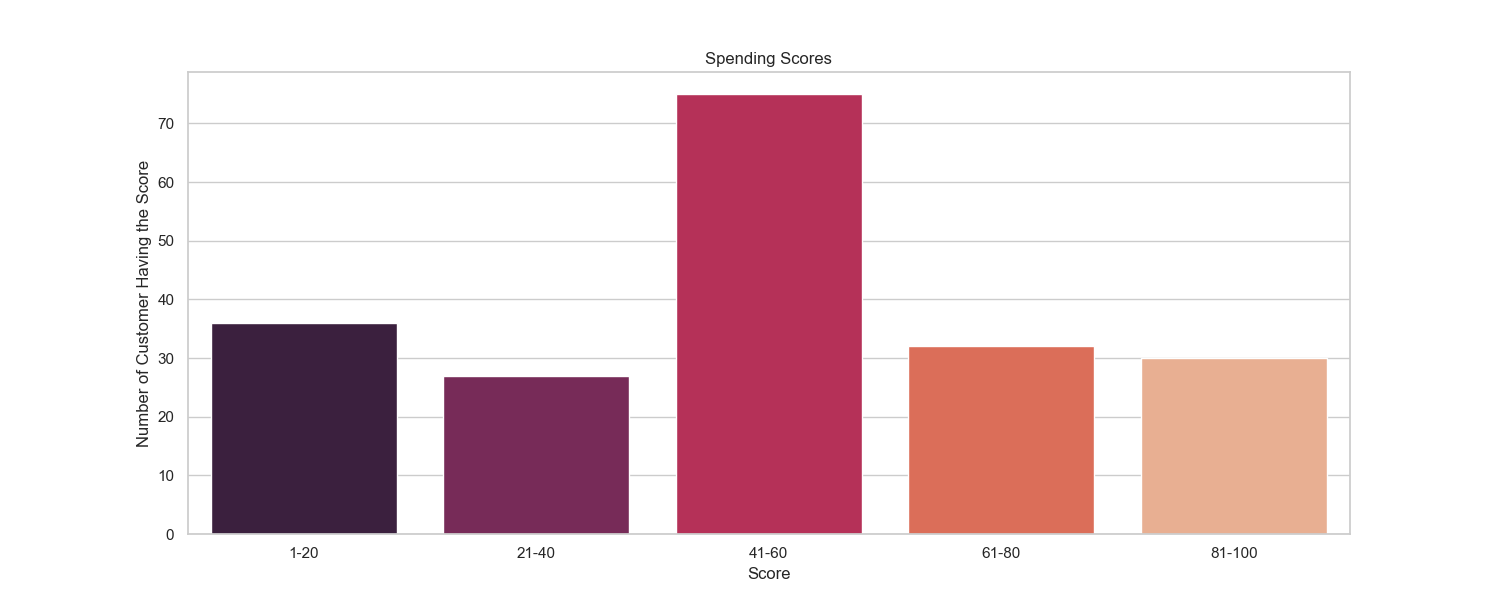

In [18]:
ss_1_20 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)
]
ss_21_40 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)
]
ss_41_60 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)
]
ss_61_80 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)
]
ss_81_100 = df["Spending Score (1-100)"][
    (df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)
]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [
    len(ss_1_20.values),
    len(ss_21_40.values),
    len(ss_41_60.values),
    len(ss_61_80.values),
    len(ss_81_100.values),
]

plt.figure(figsize=(15, 6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

C:\Users\Makara\AppData\Local\Temp\ipykernel_13864\1880025947.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Spectral")


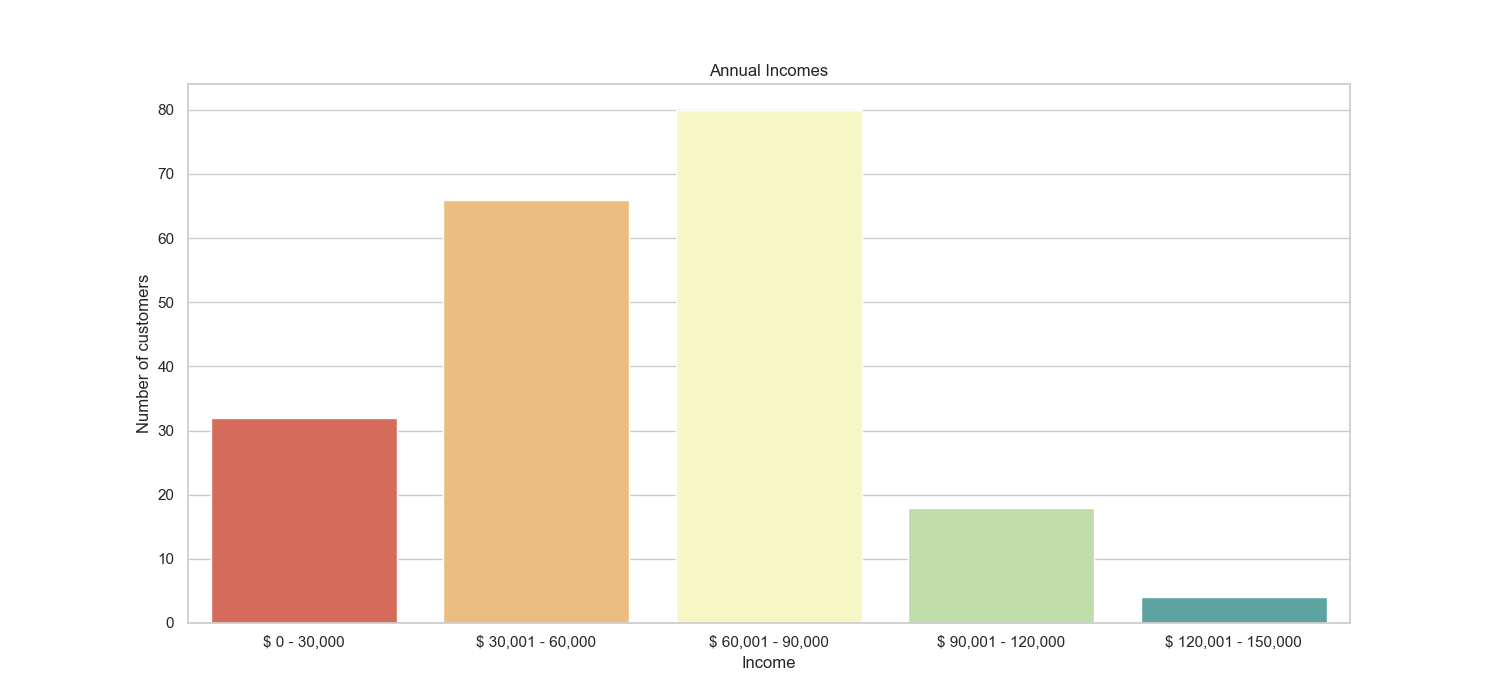

In [19]:
ai0_30 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)
]
ai31_60 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)
]
ai61_90 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)
]
ai91_120 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)
]
ai121_150 = df["Annual Income (k$)"][
    (df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)
]

aix = [
    "$ 0 - 30,000",
    "$ 30,001 - 60,000",
    "$ 60,001 - 90,000",
    "$ 90,001 - 120,000",
    "$ 120,001 - 150,000",
]
aiy = [
    len(ai0_30.values),
    len(ai31_60.values),
    len(ai61_90.values),
    len(ai91_120.values),
    len(ai121_150.values),
]

plt.figure(figsize=(15, 7))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()

clustering


In [20]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

#### for age ~ Spending Score (1-100)


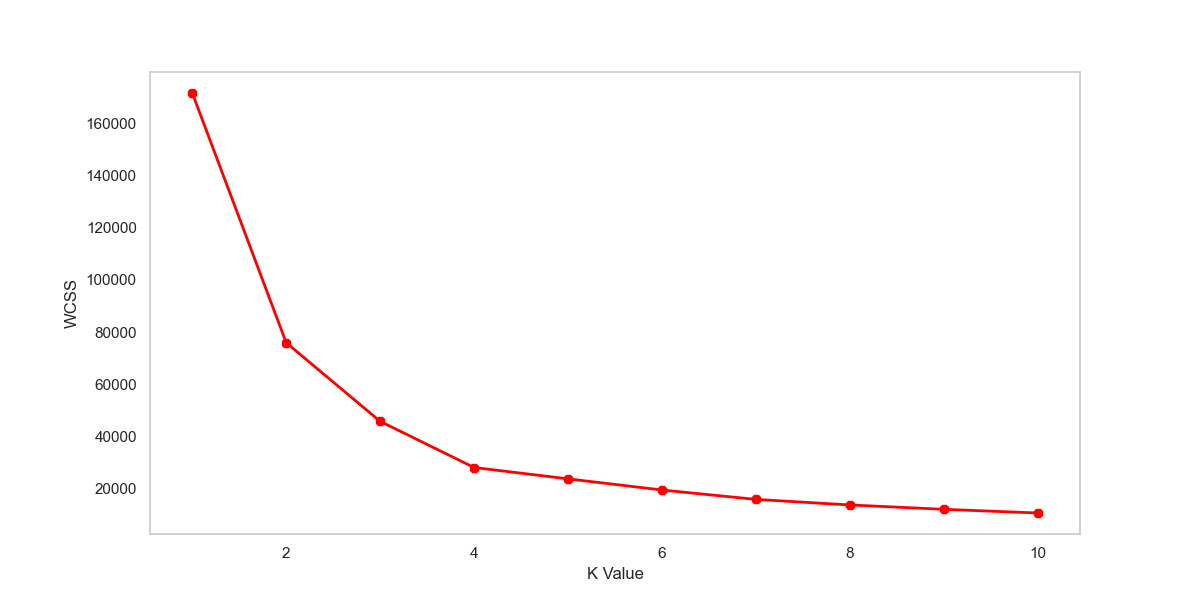

In [21]:
x1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values
wcss = []  # within cluster sum of squares to
# understand the optimum no. of culsters
# that we need

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

`fit_predict`: This method is a combination of fit() and predict(). It first fits the model on the given data and then makes predictions on the same data. This method is commonly used in unsupervised learning algorithms like clustering where the same data is used for training and prediction.

In [22]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)

label

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

centroids


In [23]:
kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

In [24]:
kmeans.labels_

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

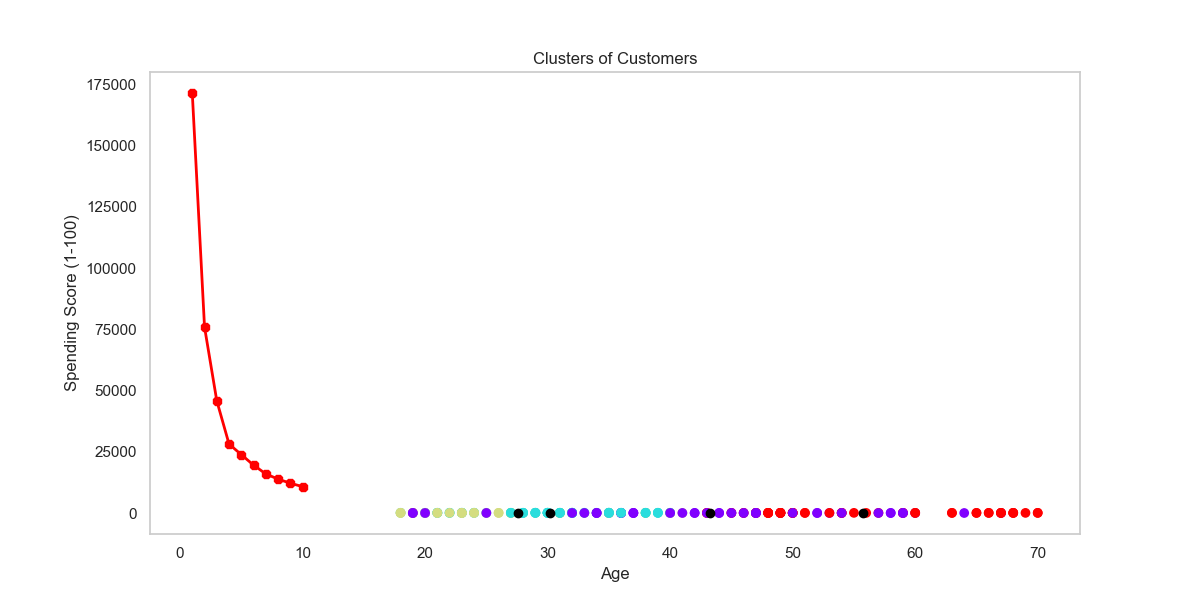

In [25]:
plt.scatter(x1[:, 0], x1[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### for Annual Income (k$) ~ Spending Score (1-100)


In [26]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

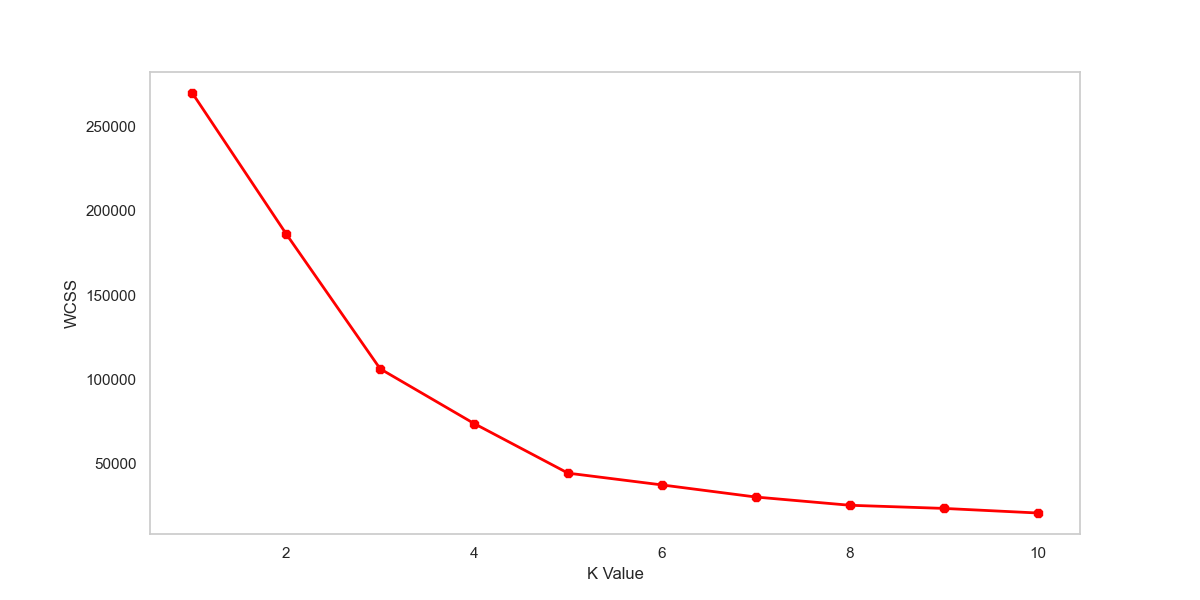

In [27]:
x2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values
wcss = []  # within cluster sum of squares to
# understand the optimum no. of culsters
# that we need

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x2)
label

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [29]:
kmeans.cluster_centers_

array([[ 48.26      ,  56.48      ],
       [124.        ,  17.5       ],
       [ 82.64705882,  18.76470588],
       [ 86.53846154,  82.12820513],
       [ 26.30434783,  20.91304348]])

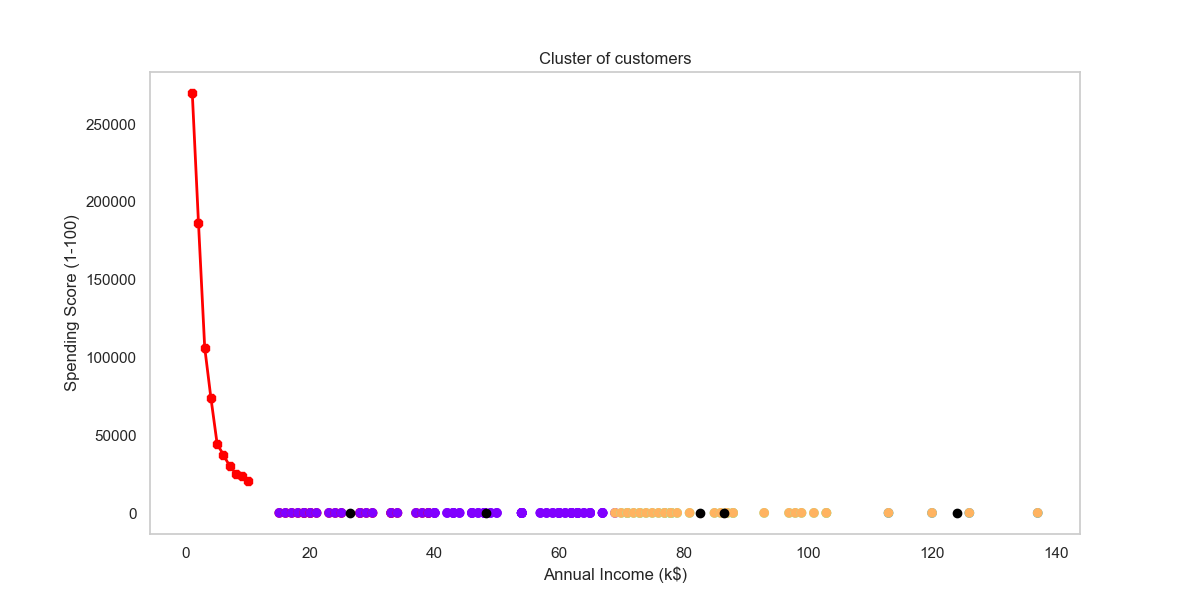

In [30]:
plt.scatter(x2[:, 0], x2[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black")
plt.title("Cluster of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [31]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

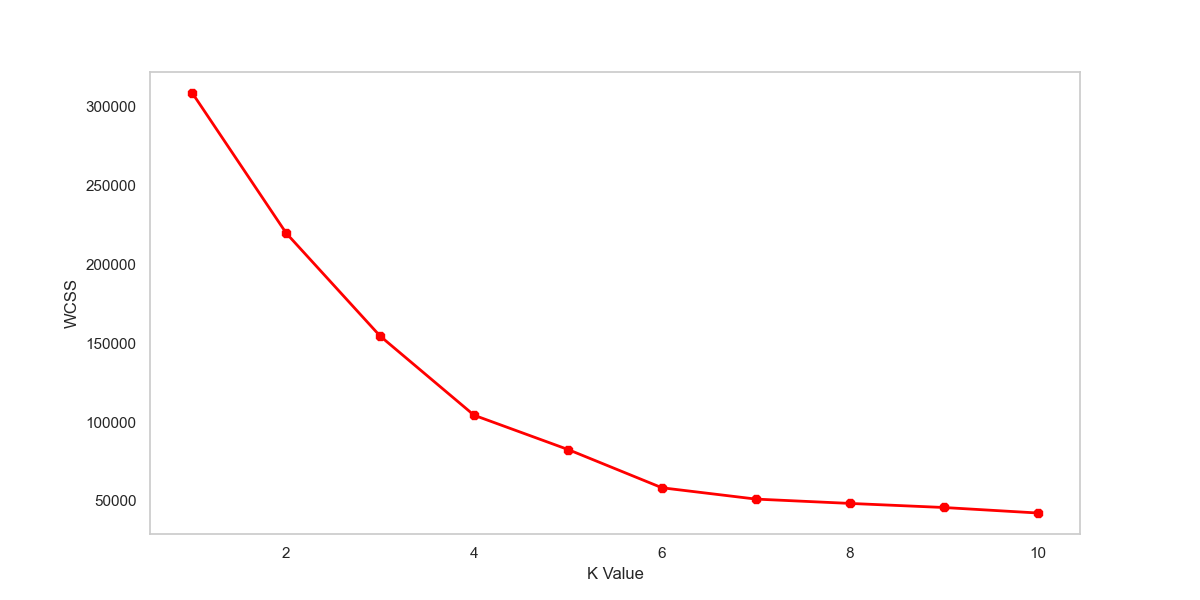

In [32]:
x3 = df.iloc[:, 1:]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x3)
label

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [34]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]]


In [35]:
clusters = kmeans.fit_predict(x3)
df["label"] = clusters

fig = px.scatter_3d(
    df,
    x="Age",
    y="Annual Income (k$)",
    z="Spending Score (1-100)",
    color="label",
    color_continuous_scale="Rainbow",
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

In [36]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x3)

# Pickle the model
with open('customer_clustering_model.pkl', 'wb') as f:
  pkl.dump(kmeans, f)

In [37]:
df.iloc[0, 1:-1].values

array([19, 15, 39], dtype=object)

In [38]:
# Load the pickled model
with open('customer_clustering_model.pkl', 'rb') as f:
    kmeans = pkl.load(f)

# Sample data
x_new = np.array([[19, 15, 39]])

# Get predictions
labels_new = kmeans.predict(x_new)

print(labels_new)

[4]


C:\Users\Makara\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

